In [2]:
library("limma")
library("edgeR")

In [3]:
source("/ufrc/soltis/shan158538/TragFL_NewAnalysis/SLURM/rnaseq_plot_funcs.R")
# source causes R to accept its input from the named file

In [4]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/Tdu_Tpr_voom_Tms')
# set working directory in R

In [5]:
targets <- readTargets()
# the default file to be read here is Traget.txt

In [6]:
print(targets)

                            files group description
1 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4
2 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5
3 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6
4 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1
5 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2
6 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3


In [7]:
d <- readDGE(targets, sep=",")
# readDGE: Reads and merges a set of text files containing gene expression counts

In [8]:
print(dim(d))
# dim: Retrieve or set the dimension of an object

[1] 11864     6


In [9]:
printHead(d)

$samples
                            files group description lib.size norm.factors
1 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4   900223            1
2 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5  1109924            1
3 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6   982266            1
4 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814            1
5 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907            1
6 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250            1

$counts
                                                      Samples
Tags                                                     1    2   3   4    5
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  106  116 121 103  173
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  177  169 238 204  402
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1  43   36  47  21   25
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1    80  126 108 141  200
  Tpr_TRINITY_DN1

In [10]:
colnames(d) <- c("Tdu_4","Tdu_5","Tdu_6","Tpr_1","Tpr_2","Tpr_3")

In [11]:
printHead(d)

$samples
                                files group description lib.size norm.factors
Tdu_4 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4   900223            1
Tdu_5 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5  1109924            1
Tdu_6 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6   982266            1
Tpr_1 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814            1
Tpr_2 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907            1
Tpr_3 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250            1

$counts
                                                      Samples
Tags                                                   Tdu_4 Tdu_5 Tdu_6 Tpr_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1    106   116   121   103
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    177   169   238   204
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    43    36    47    21
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1      

In [12]:
keep <- rowSums(cpm(d) > cpm(10,mean(d$samples$lib.size))[1]) >= 6
# rowSums: sum values of Raster objects by row or column
# cpm: Computes counts per million (CPM)
# The $ allows you extract elements by name

### What's the meaning of ">= 6"? I guess this step removes loci with < 10 counts per million based on the average library size.

In [13]:
d <- d[keep,]

In [14]:
printHead(d)

$samples
                                files group description lib.size norm.factors
Tdu_4 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4   900223            1
Tdu_5 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5  1109924            1
Tdu_6 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6   982266            1
Tpr_1 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814            1
Tpr_2 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907            1
Tpr_3 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250            1

$counts
                                                      Samples
Tags                                                   Tdu_4 Tdu_5 Tdu_6 Tpr_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1    106   116   121   103
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    177   169   238   204
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    43    36    47    21
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1      

In [15]:
pdf("boxplot_log-CPM.pdf")
# starts the graphics device driver for producing PDF graphics

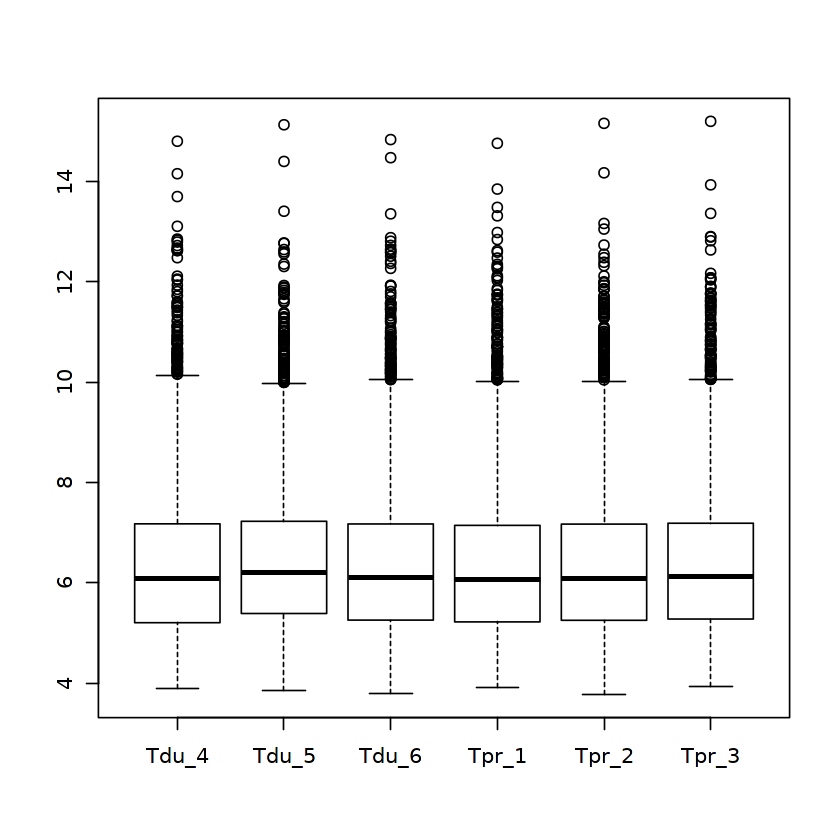

In [16]:
boxplot(cpm(d$counts + 1, log=TRUE))
# boxplot: Produce box-and-whisker plot(s) of the given (grouped) values
# log: character indicating if x or y or both coordinates should be plotted in log scale.

In [17]:
dev.off()
# This function closes the specified plot (by default the current device) and if it is an imguR device, uploads the plots for web hosting

pdf 
  3

In [18]:
trt = factor(c(1,1,1,2,2,2), labels=c("Tdu","Tpr"))
# factor: The function factor is used to encode a vector as a factor
# lables: an optional character vector of labels for the levels

In [19]:
printHead(trt)

[1] Tdu Tdu Tdu Tpr Tpr Tpr
Levels: Tdu Tpr


In [20]:
design=model.matrix(~0 + trt)
# model.matrix creates a design (or model) matrix, e.g., by expanding factors to a set of dummy variables (depending on the contrasts) and expanding interactions similarly.

In [21]:
printHead(design)

  trtTdu trtTpr
1      1      0
2      1      0
3      1      0
4      0      1
5      0      1
6      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$trt
[1] "contr.treatment"



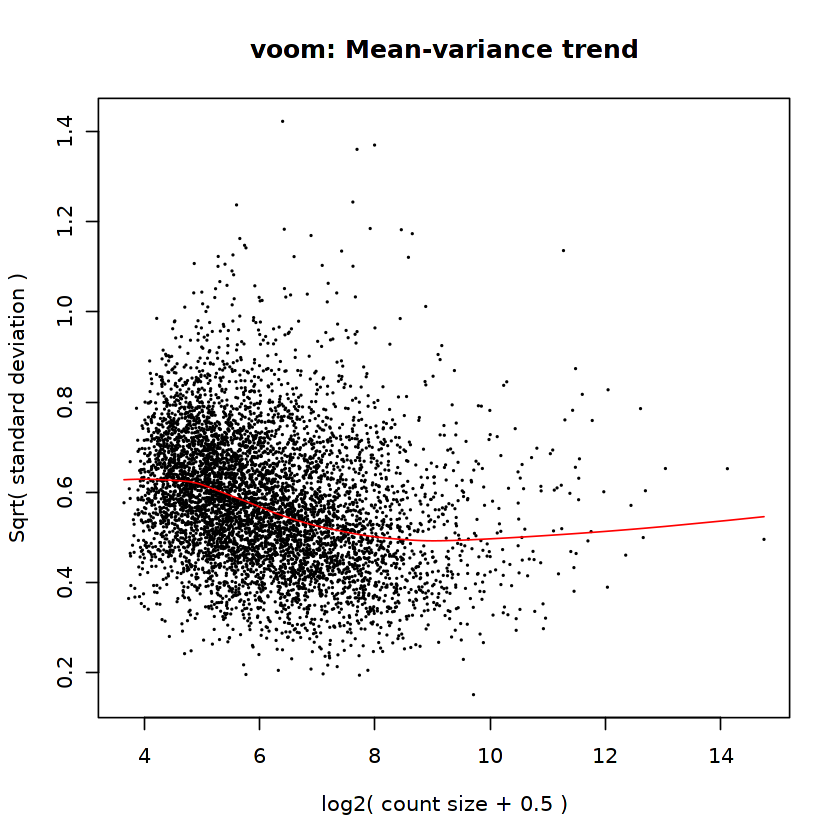

In [22]:
voom=voom(d, design, plot=TRUE)
# voom: This function is intended to process RNA-Seq or ChIP-Seq data prior to linear modelling in limma.
# The key concern is to estimate the mean-variance relationship in the data, then use this to compute appropriate weights for each observation. Count data almost show non-trivial mean-variance relationships. Raw counts show increasing variance with increasing count size, while log-counts typically show a decreasing mean-variance trend.
# Transform count data to log2-counts per million (logCPM), estimate the mean-variance relationship and use this to compute appropriate observational-level weights. The data are then ready for linear modelling.

In [23]:
write.table(voom$E, "voom_expression_values.txt", sep="\t", quote=F, row.names = TRUE)
# write.table prints its required argument x to a file
# quote: If FALSE, nothing is quoted.

In [24]:
fit = lmFit(voom, design)
# lmFit: Fit linear model for each gene given a series of arrays

In [25]:
printHead(fit)

$coefficients
                                                       trtTdu   trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  6.847719 6.902947
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  7.596650 8.095975
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 5.400015 4.515597
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   6.705674 7.309773
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  9.883551 9.870358
6137 more rows ...

$stdev.unscaled
                                                        trtTdu    trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  0.1628597 0.1642038
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  0.1501984 0.1461505
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 0.2063194 0.2246769
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   0.1662519 0.1559619
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  0.1422724 0.1420469
6137 more rows ...

$sigma
[1] 0.4078504 0.9522550 0.9036629 0.6916047 0.3317175
6137 

In [26]:
overall_model <- eBayes(fit)
# eBayes: Empirical Bayes Statistics For Differential Expression
# Given a microarray linear model fit, compute moderated t-statistics, moderated F-statistic, and log-odds of differential expression by empirical Bayes moderation of the standard errors towards a common value.

### could I perform one-tailed t-test here?

In [27]:
printHead(overall_model)

$coefficients
                                                       trtTdu   trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  6.847719 6.902947
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  7.596650 8.095975
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 5.400015 4.515597
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   6.705674 7.309773
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  9.883551 9.870358
6137 more rows ...

$stdev.unscaled
                                                        trtTdu    trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  0.1628597 0.1642038
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  0.1501984 0.1461505
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 0.2063194 0.2246769
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   0.1662519 0.1559619
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  0.1422724 0.1420469
6137 more rows ...

$sigma
[1] 0.4078504 0.9522550 0.9036629 0.6916047 0.3317175
6137 

In [28]:
pdf("residual_std_dev.pdf")
# standard deviation (SD, also represented by the lower case Greek letter sigma σ)

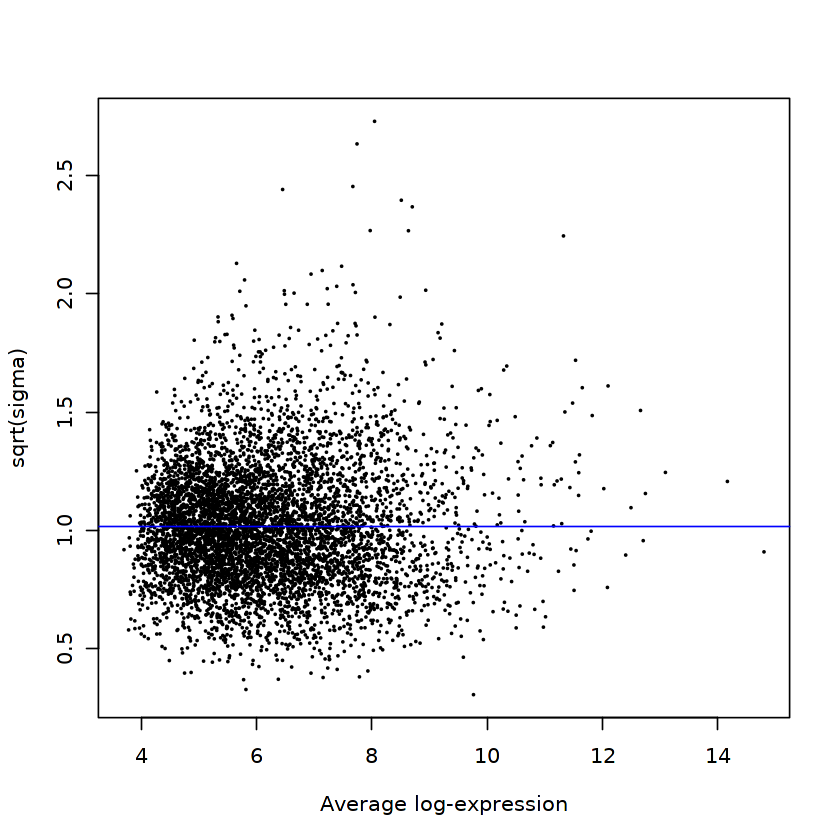

In [29]:
plotSA(overall_model)

In [30]:
dev.off()

pdf 
  3

In [31]:
topTable(overall_model, coef=ncol(design))
# topTable: Extract a table of the top-ranked genes from a linear model fit; selecting the top-ranked genes for any given contrast

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN12100_c1_g5|Tdu_TRINITY_DN21143_c2_g4,11.049097,10.974952,89.08162,9.061481e-17,4.817536e-14,26.70135
Tpr_TRINITY_DN15394_c3_g2|Tdu_TRINITY_DN15869_c0_g1,10.742663,10.502510,87.51205,1.096691e-16,4.817536e-14,26.64643
Tpr_TRINITY_DN11390_c1_g6|Tdu_TRINITY_DN18121_c6_g1,9.911668,9.762539,85.13342,1.474223e-16,4.817536e-14,26.58941
Tpr_TRINITY_DN15008_c0_g3|Tdu_TRINITY_DN22494_c7_g1,10.731644,11.011958,86.48973,1.244148e-16,4.817536e-14,26.57930
Tpr_TRINITY_DN11525_c2_g3|Tdu_TRINITY_DN17060_c5_g3,10.682773,10.824764,85.46174,1.414550e-16,4.817536e-14,26.51473
Tpr_TRINITY_DN13509_c0_g1|Tdu_TRINITY_DN20057_c3_g7,10.859500,10.968231,85.48974,1.409585e-16,4.817536e-14,26.49095
Tpr_TRINITY_DN13224_c2_g2|Tdu_TRINITY_DN21311_c1_g1,11.389230,11.506372,86.61324,1.225232e-16,4.817536e-14,26.48334
Tpr_TRINITY_DN13172_c2_g3|Tdu_TRINITY_DN24164_c1_g1,10.651003,10.568134,84.91815,1.514842e-16,4.817536e-14,26.48079
Tpr_TRINITY_DN11402_c7_g3|Tdu_TRINITY_DN22216_c3_g3,10.468170,10.359479,84.46931,1.603519e-16,4.817536e-14,26.47313


In [32]:
top=topTable(overall_model, sort="none", n=Inf, coef=ncol(design))
# Toptable output for all probes in original (unsorted) order can be obtained by topTable(fit,sort="none",n=Inf)

In [33]:
write.table(top, "DE_overall_model.txt", sep="\t", quote=F, row.names = TRUE)

In [34]:
print(summary(top))
# logFC: log2-fold-change

     logFC           AveExpr             t             P.Value         
 Min.   : 3.576   Min.   : 3.701   Min.   : 9.027   Min.   :0.000e+00  
 1st Qu.: 5.075   1st Qu.: 5.142   1st Qu.:22.093   1st Qu.:3.000e-13  
 Median : 5.955   Median : 5.952   Median :29.718   Median :1.150e-11  
 Mean   : 6.187   Mean   : 6.194   Mean   :33.464   Mean   :5.047e-09  
 3rd Qu.: 7.051   3rd Qu.: 7.032   3rd Qu.:42.349   3rd Qu.:2.645e-10  
 Max.   :14.983   Max.   :14.800   Max.   :91.060   Max.   :2.404e-06  
   adj.P.Val               B         
 Min.   :0.000e+00   Min.   : 5.046  
 1st Qu.:1.000e-12   1st Qu.:14.287  
 Median :2.290e-11   Median :17.293  
 Mean   :5.120e-09   Mean   :17.503  
 3rd Qu.:3.527e-10   3rd Qu.:20.805  
 Max.   :2.404e-06   Max.   :26.701  


In [35]:
contrast.matrix = makeContrasts(contrasts=c("trtTdu-trtTpr"), levels=design)
# makeContrasts: Construct the contrast matrix corresponding to specified contrasts of a set of parameters

In [36]:
fit2 = contrasts.fit(fit, contrast.matrix)
# contrasts.fit: Given a linear model fit to microarray data, compute estimated coefficients and standard errors for a given set of contrasts.

In [37]:
fit2 = eBayes(fit2)

In [38]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_Tdu_Tpr.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN12451_c1_g4|Tdu_TRINITY_DN22402_c2_g3,-3.291341,8.570626,-17.12737,3.806394e-09,2.337887e-05,11.285380
Tpr_TRINITY_DN10564_c0_g1|Tdu_TRINITY_DN16653_c0_g1,4.411368,7.824222,15.84971,8.506033e-09,2.612203e-05,10.390888
Tpr_TRINITY_DN10835_c3_g2|Tdu_TRINITY_DN19567_c0_g4,-2.813615,6.796728,-12.97573,6.618207e-08,1.016226e-04,8.620246
Tpr_TRINITY_DN11894_c0_g1|Tdu_TRINITY_DN15151_c0_g1,3.121217,6.425034,13.04855,6.252471e-08,1.016226e-04,8.619772
Tpr_TRINITY_DN10604_c3_g3|Tdu_TRINITY_DN18047_c0_g1,2.738812,6.722012,12.33795,1.102502e-07,1.354313e-04,8.163560
Tpr_TRINITY_DN1078_c0_g1|Tdu_TRINITY_DN9793_c0_g1,-2.760491,6.986112,-11.77276,1.767578e-07,1.809411e-04,7.766178
Tpr_TRINITY_DN9365_c0_g1|Tdu_TRINITY_DN14182_c0_g1,-2.838701,5.962469,-11.38094,2.480700e-07,2.176637e-04,7.368110
Tpr_TRINITY_DN10137_c4_g1|Tdu_TRINITY_DN22038_c0_g4,-3.007461,7.183660,-11.05916,3.301792e-07,2.306171e-04,7.198373
Tpr_TRINITY_DN12160_c1_g3|Tdu_TRINITY_DN16869_c3_g1,-2.147876,7.584441,-11.01144,3.446897e-07,2.306171e-04,7.194691
